In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *

In [62]:
df_temp=pd.read_csv('body_level_classification_train.csv')
class_temp=df_temp[df_temp['Body_Level']=='Body Level 1'].drop(columns=['Body_Level'])


50.11651882105264


In [54]:
df,attributes,class_1_df,class_2_df,class_3_df,class_4_df=read_data()

# Analyze the dataset

In [44]:
def check_missing_value():
    return attributes.isnull().values.any(), df['Body_Level'].isnull().values.any()
print(f'attributes missing value: {check_missing_value()[0]}')
print(f'classes missing value: {check_missing_value()[1]}')

attributes missing value: False
classes missing value: False


* No missing values

In [55]:
def classes_probability():
    class_prob = {}
    for c in df['Body_Level'].unique():
        class_prob[c] = len(df[df['Body_Level'] == c]) / len(df)
    return class_prob
class_prob=classes_probability()
for key, value in class_prob.items():
    print(f'probability of class {key}: {value}')

probability of class 1: 0.12863913337846988
probability of class 2: 0.13608666215301288
probability of class 3: 0.27488151658767773
probability of class 4: 0.46039268788083954


* we can see that the dataset is imbalanced as the last class(class 4) has almost 50% of the data samples.

In [57]:
def plot_hist_class(class_num):
    #from df get rows with Body_Level== Body Level class_num
    #and plot histogram for each attribute
    if class_num==1:
        class_df=class_1_df
    elif class_num==2:
        class_df=class_2_df
    elif class_num==3:
        class_df=class_3_df
    else:
        class_df=class_4_df
    fig, axs = plt.subplots(4, 4, figsize=(20, 12))
    axs = axs.flatten()
    for i, col in enumerate(class_df.columns):
        axs[i].hist(class_df[col], bins=10)
        axs[i].set_title(col)
    plt.tight_layout()
    plt.show()
     

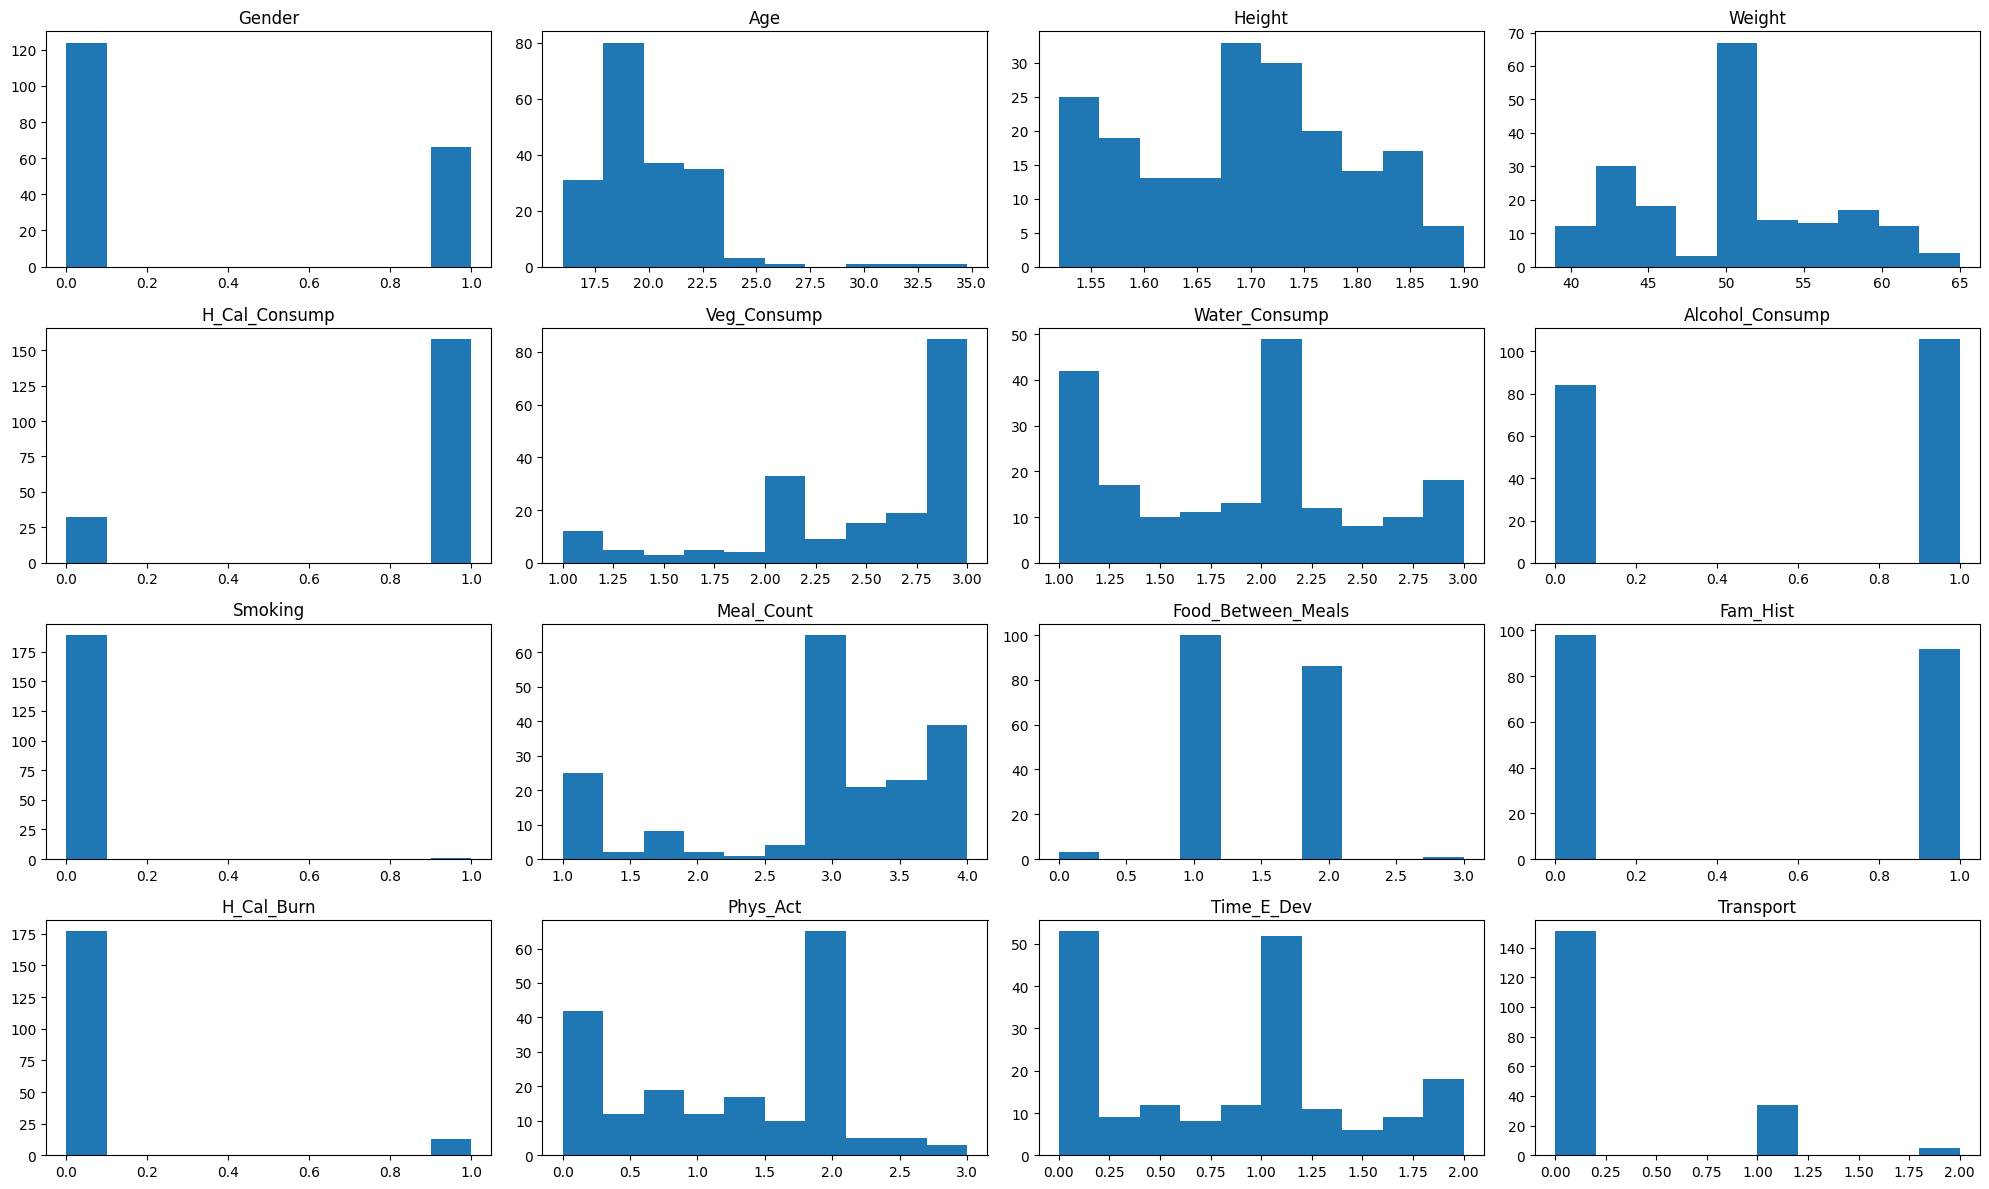

In [58]:
plot_hist_class(1)

## our findings for class1(underweight)
1-females are the dominant gender in the dataset in class 1
2-most of the people in class 1 are in the age range of 17-23
3-most of the people in class 1 are in the weight range of 40-60
4-almost non of them smoke

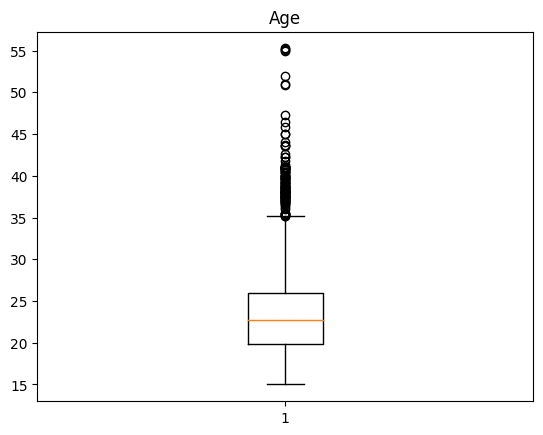

number of outliers in Age: 119
-----------------------------------------------------


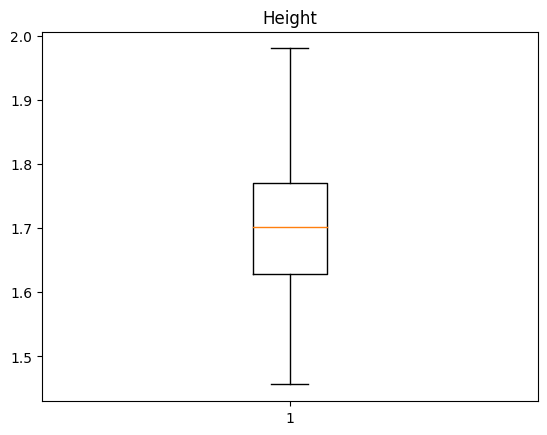

number of outliers in Height: 0
-----------------------------------------------------


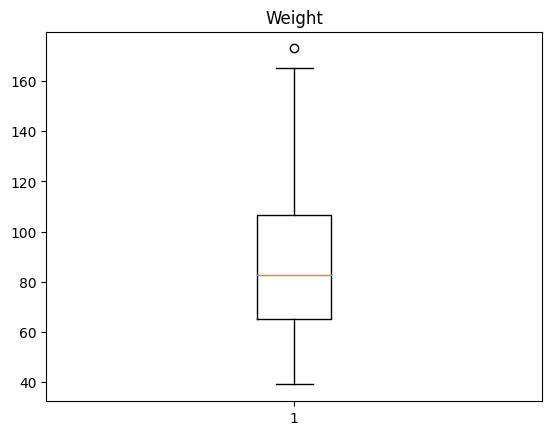

number of outliers in Weight: 1
-----------------------------------------------------


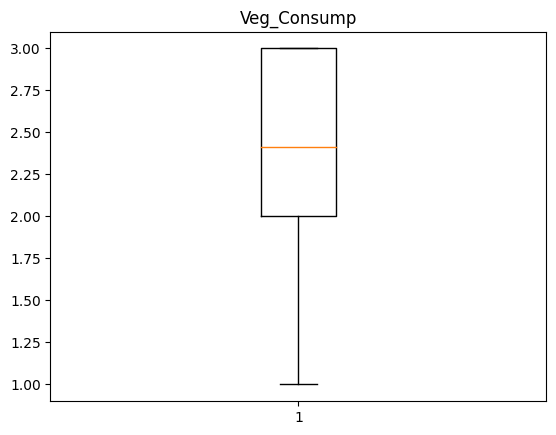

number of outliers in Veg_Consump: 0
-----------------------------------------------------


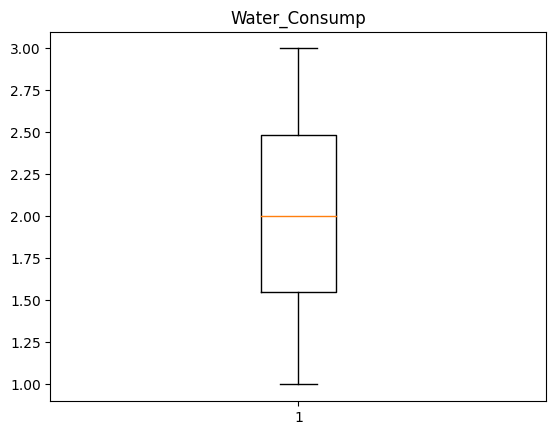

number of outliers in Water_Consump: 0
-----------------------------------------------------


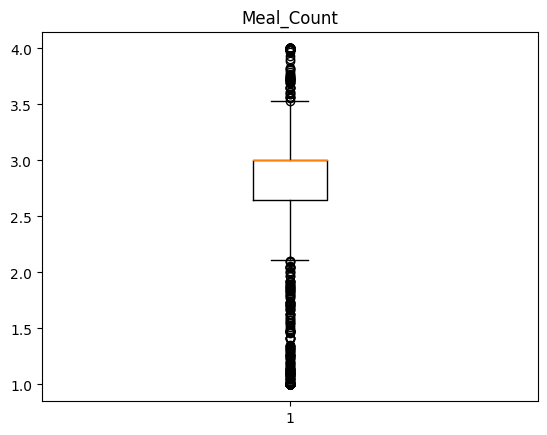

number of outliers in Meal_Count: 405
-----------------------------------------------------


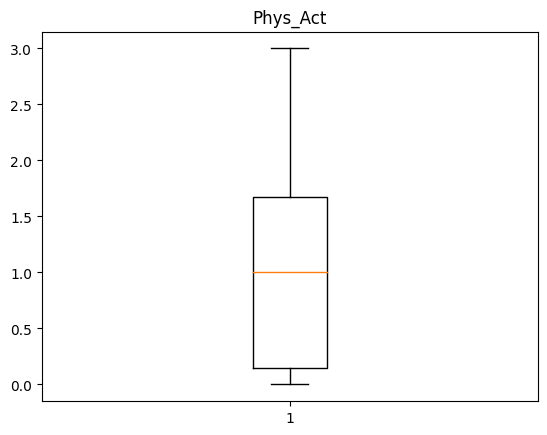

number of outliers in Phys_Act: 0
-----------------------------------------------------


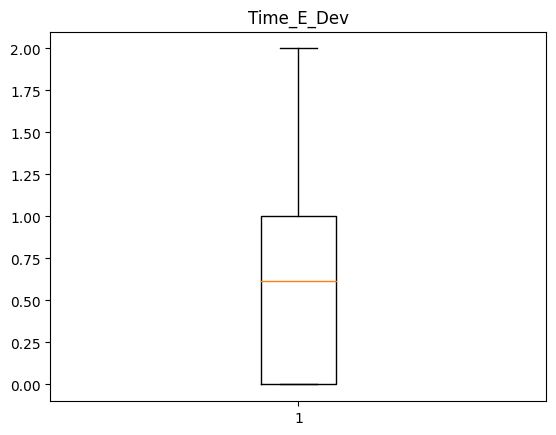

number of outliers in Time_E_Dev: 0
-----------------------------------------------------


In [47]:
def check_outliers():
    for col in attributes.columns:
        if attributes[col].dtype != 'category':
            if not is_categorical(col):
                plt.boxplot(attributes[col])
                plt.title(col)
                plt.show()
                #count number of outliers in each attribute 
                q1 = np.percentile(attributes[col], 25)
                q3 = np.percentile(attributes[col], 75)
                iqr = q3 - q1
                lower_bound = q1 - (1.5 * iqr)
                upper_bound = q3 + (1.5 * iqr)
                print(f'number of outliers in {col}: {len(attributes[(attributes[col] < lower_bound) | (attributes[col] > upper_bound)])}')
                #print line to separate each attribute
                print('-----------------------------------------------------')
check_outliers()

* Age and meals count suffer from outliers
* we need to handle them by removing them or by using robust statistics

In [48]:
def mode_of_attribuite():
    '''
    return most frequent value of each attribute
    '''
    for col in attributes.columns:
        print(f'mode of {col}: {attributes[col].mode()[0]}')
mode_of_attribuite()

mode of Gender: 1
mode of Age: 18.0
mode of Height: 1.7
mode of Weight: 80.0
mode of H_Cal_Consump: 1
mode of Veg_Consump: 3.0
mode of Water_Consump: 2.0
mode of Alcohol_Consump: 1
mode of Smoking: 0
mode of Meal_Count: 3.0
mode of Food_Between_Meals: 1
mode of Fam_Hist: 1
mode of H_Cal_Burn: 0
mode of Phys_Act: 0.0
mode of Time_E_Dev: 0.0
mode of Transport: 0


* we can conclude that the data is not balanced as the Body Level 4 is the majority class(almost half of the data)
* we need to use oversampling or undersampling to balance the data

In [50]:
def analyze_class(class_number):
    #get rows with Body_Level='Body Level 1'
    class_attr = df[df['Body_Level'] == f'Body Level {class_number}'][df.columns[:-1]]
 

analyze_class(1)
analyze_class(2)
analyze_class(3)
analyze_class(4)

In [51]:
def dummy_model():
        my_predications = []
        for i in range(len(attributes)):
            bmi = attributes['Weight'][i] / (attributes['Height'][i] ** 2)
            if bmi < 18.5:
                my_predications.append(1)
            elif bmi < 25:
                my_predications.append(2)
            elif bmi < 30:
                my_predications.append(3)
            else:
                my_predications.append(4)
        #calculate accuracy
        correct = 0
        print(len(df['Body_Level']))
        for i in range(len(df['Body_Level'])):
            if df['Body_Level'][i] == my_predications[i]:
                correct += 1
        print(f'accuracy of dummy model: {correct / len(df["Body_Level"])}')
dummy_model()

1477
accuracy of dummy model: 0.987136086662153


# Data Preprocessing

# Apply machine learning methods